# Ensemble learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

In [ ]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    xlim(0, 6) +
    ylim(0, 6) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

In [ ]:
 def generate_grid(start, stop, ppu):
  """
  Function that creates data for the 
  decision boundary visualisation. 
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [ ]:
start = 0 
stop = 6
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)
grid_data.shape

(14400, 2)

# Boosting

## Adaptive boosting (Adaboost)
We shall build decision stumps (decision trees of depth 1) on the toy data.

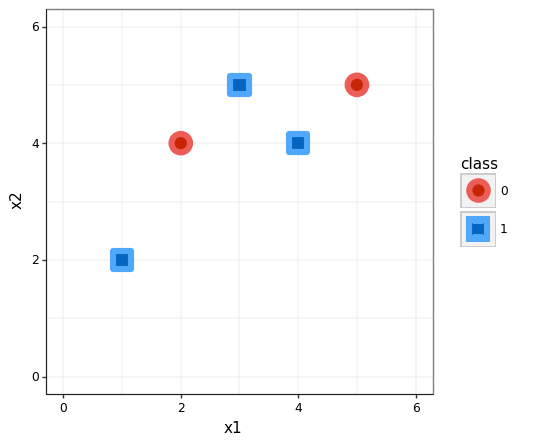

<ggplot: (8739054750697)>

In [ ]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(example_data)

Let's see how the usual decision tree would look like on this data.

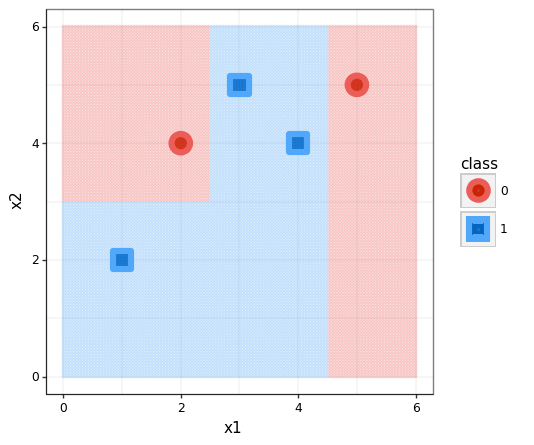

<ggplot: (8739054749597)>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# training a decision tree classifier on example data
dt.fit(example_data[['x1', 'x2']], example_data[['class']])

# predicting grid data
grid_data['dt'] = dt.predict(grid_data[['x1', 'x2']])

# visualise the initial egalitarian tree
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(dt)'),  size = .5, alpha = 0.2)

Here we shall build a boosting ensemble. Let's build the first decision stump:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=1) # remember that it can only have 1 level

In [ ]:
initial_weights = np.ones(len(example_data)) # egalitarian world
print(initial_weights)

np.random.seed(1111)

model1.fit(example_data[['x1', 'x2']], example_data[['class']], sample_weight = initial_weights)

[1. 1. 1. 1. 1.]


DecisionTreeClassifier(max_depth=1)

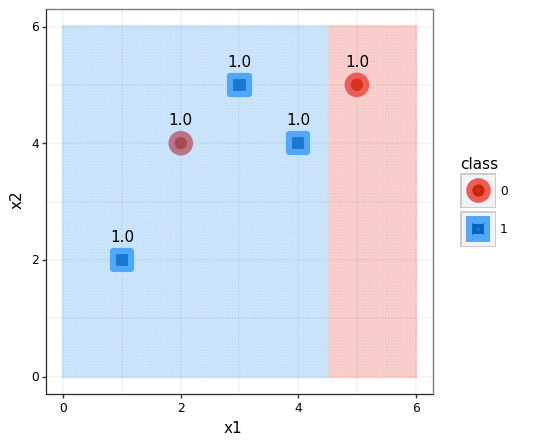

<ggplot: (8739054753533)>

In [ ]:
grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])

# visualise the initial egalitarian tree
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + geom_text(aes(label = initial_weights), nudge_y = 0.4)

In [ ]:
incorrect = model1.predict(example_data[['x1', 'x2']]) != example_data['class']
print(np.array(incorrect))

[False  True False False False]


In [ ]:
np.array(~incorrect)

array([ True, False,  True,  True,  True])

**Exercise** update the weights as discussed in the lecture (add score of 0.5 to those points that were misclassified and remove 0.5 from classified correctly) 

In [ ]:
new_weights = initial_weights.copy()

##### YOUR CODE STARTS #####
new_weights[np.array(~incorrect)] = new_weights[np.array(~incorrect)] - 0.5
new_weights[np.array(incorrect)] = new_weights[np.array(incorrect)] + 0.5
##### YOUR CODE ENDS #####

print(new_weights)

[0.5 1.5 0.5 0.5 0.5]


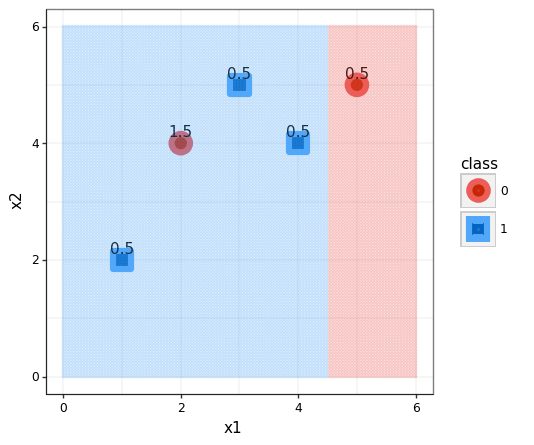

<ggplot: (8739054617229)>

In [ ]:
draw_points_ggplot2(example_data) + geom_text(aes(label = new_weights), nudge_y = 0.2) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2)

**Exercise** Repeat the same process for models #2 and #3.

Let's build the second tree using these new weights

In [ ]:
np.random.seed(1111)
##### YOUR CODE STARTS #####
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(example_data[['x1','x2']], example_data[['class']], sample_weight = new_weights)
##### YOUR CODE ENDS #####

DecisionTreeClassifier(max_depth=1)

Visualising boundaries of the second tree:

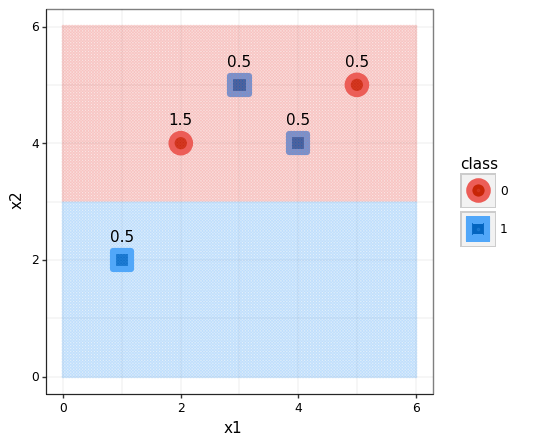

<ggplot: (8739054223025)>

In [ ]:
##### YOUR CODE STARTS #####
grid_data['model2'] = model2.predict(grid_data[['x1', 'x2']])
##### YOUR CODE ENDS #####
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2) + geom_text(aes(label = new_weights), nudge_y = 0.4)

In [ ]:
##### YOUR CODE STARTS #####
incorrect = model2.predict(example_data[['x1','x2']]) != example_data['class']
##### YOUR CODE ENDS #####

print(np.array(incorrect))

[False False  True  True False]


Changing the weights for the second time:

In [ ]:
##### YOUR CODE STARTS #####
newer_weights = new_weights.copy()
newer_weights[np.array(incorrect)] = newer_weights[np.array(incorrect)] + 0.5
newer_weights[np.array(~incorrect)] = newer_weights[np.array(~incorrect)] - 0.5
##### YOUR CODE ENDS #####
print(newer_weights)

[0. 1. 1. 1. 0.]


In [ ]:
np.random.seed(1111)

model3 = DecisionTreeClassifier(max_depth=1)
##### YOUR CODE STARTS #####
model3.fit(example_data[['x1', 'x2']], example_data[['class']], sample_weight = newer_weights)
##### YOUR CODE ENDS #####

DecisionTreeClassifier(max_depth=1)

Visualising the decision boundaries of the third tree

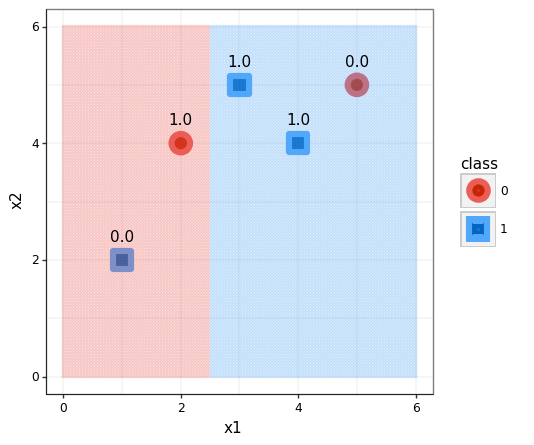

<ggplot: (8739054043129)>

In [ ]:
##### YOUR CODE STARTS #####
grid_data['model3'] = model3.predict(grid_data[['x1', 'x2']])
##### YOUR CODE ENDS #####
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2) + geom_text(aes(label = newer_weights), nudge_y = 0.4)

Putting all these trees together into one model

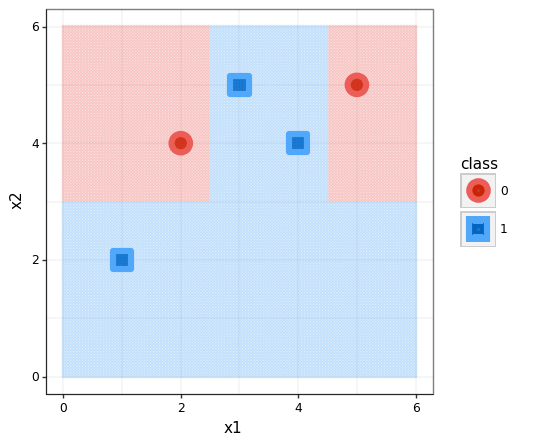

<ggplot: (8739150577985)>

In [ ]:
grid_data['ensemble'] = grid_data[['model1', 'model2', 'model3']].mode(axis = 1)
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ensemble)'),  size = .5, alpha = 0.2)

Let's compare to the official `AdaBoostClassifier` implmentation from the `sklearn`. Pay attention to the parameters, we want 3 models, with each one of them being `DecisionTreeClassifier` with `max_depth = 1`.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)

# train AdaBoost on our data
np.random.seed(1111)
model.fit(example_data[['x1','x2']], example_data[['class']])

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=3, random_state=1)

Here we visualise AdaBoost decision boundaries

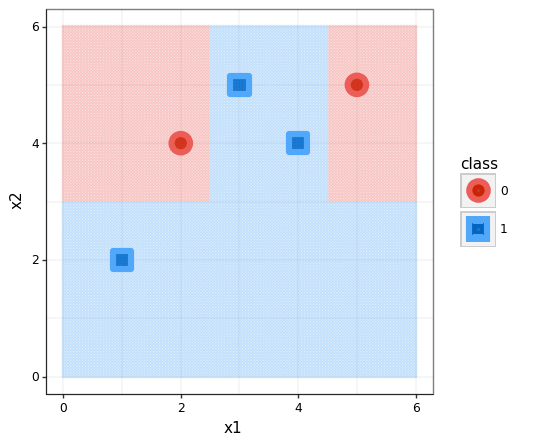

<ggplot: (8739054755813)>

In [ ]:
grid_data['ada_ensemble'] = model.predict(grid_data[['x1', 'x2']])
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ada_ensemble)'),  size = .5, alpha = 0.2)

## Gradient boosting machines (GBM)
Here we will be training a gradient boosting machine on the decision stumps. We will start by assuming that the problem we are dealing with is a regression, but transform the resulting model into a classifier at the end.

In [ ]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
# note that now we actually don't turn "class" into categorical
# we will treat this problem as regreession now

Fit the first **`DecisionTreeRegressor`** model on the original data. I have not found any restrictions on the size of the tree for the gradient boosting algorithm, but let's keep decision stumps as before.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=1) # let's keep 1 level trees

np.random.seed(111)

model1.fit(example_data[['x1', 'x2']], example_data[['class']])

DecisionTreeRegressor(max_depth=1)

Now, let's predict the data using this first tree

In [ ]:
predictions_model1 = model1.predict(example_data[['x1','x2']])
print(f'predictions of the first tree: {predictions_model1}')

predictions of the first tree: [0.75 0.75 0.75 0.75 0.  ]


Find the residuals (subtract predictions from the ground truth)

In [ ]:
errors_model1 = example_data['class'] - predictions_model1
print(f'residuals: {np.array(errors_model1)}')

residuals: [ 0.25 -0.75  0.25  0.25  0.  ]


Now use these errors as a `target` for the second tree!

In [ ]:
np.random.seed(1111)

model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X = example_data[['x1', 'x2']], y = errors_model1)

DecisionTreeRegressor(max_depth=1)

**Exercise** implement the same procedure for the second and third models

In [ ]:
##### YOUR CODE STARTS #####
predictions_model2 = model2.predict(example_data[['x1','x2']])
##### YOUR CODE ENDS #####
print(f'predictions of the second tree: {predictions_model2}')

predictions of the second tree: [-0.25       -0.25        0.16666667  0.16666667  0.16666667]


Add these to the predictions obtained by the first model. Subtract the resulting sum from the ground truth.

In [ ]:
##### YOUR CODE STARTS #####
errors_model2 = errors_model1 - predictions_model2
##### YOUR CODE ENDS #####
print(f'residuals: {np.array(errors_model2)}')

residuals: [ 0.5        -0.5         0.08333333  0.08333333 -0.16666667]


Do the same for the last third tree

In [ ]:
np.random.seed(1111)

##### YOUR CODE STARTS #####
model3 = DecisionTreeRegressor(max_depth=1)
model3.fit(X = example_data[['x1', 'x2']], y = errors_model2)
##### YOUR CODE ENDS #####

DecisionTreeRegressor(max_depth=1)

In [ ]:
##### YOUR CODE STARTS #####
predictions_model3 = model3.predict(example_data[['x1', 'x2']])
##### YOUR CODE ENDS #####
print(f'predictions of the first tree: {predictions_model3}')

predictions of the first tree: [ 0.5   -0.125 -0.125 -0.125 -0.125]


In [ ]:
##### YOUR CODE STARTS #####
errors_model3 = errors_model2 - predictions_model3
##### YOUR CODE ENDS #####
print(f'residuals: {np.array(errors_model3)}')

residuals: [ 0.         -0.375       0.20833333  0.20833333 -0.04166667]


In [ ]:
grid_data['gbm'] = model1.predict(grid_data[['x1', 'x2']]) + model2.predict(grid_data[['x1', 'x2']]) + model3.predict(grid_data[['x1', 'x2']])

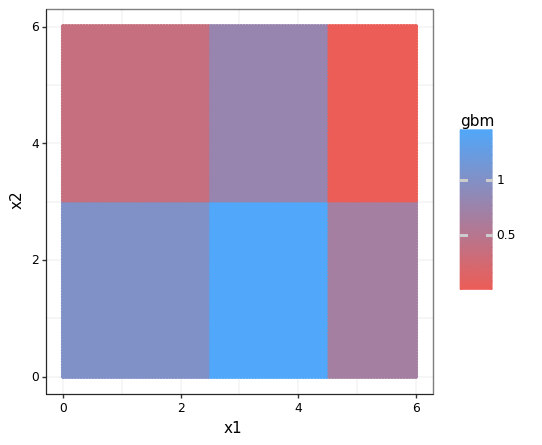

<ggplot: (8739054696445)>

In [ ]:
fig = (
    ggplot(data = grid_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'gbm'), 
               size = 1.0) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_colour_gradientn(['#EC5D57', '#51A7F9']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
fig

In [ ]:
grid_data['gbm_class'] = 0
grid_data.loc[grid_data['gbm'] >= 0.5, 'gbm_class'] = 1

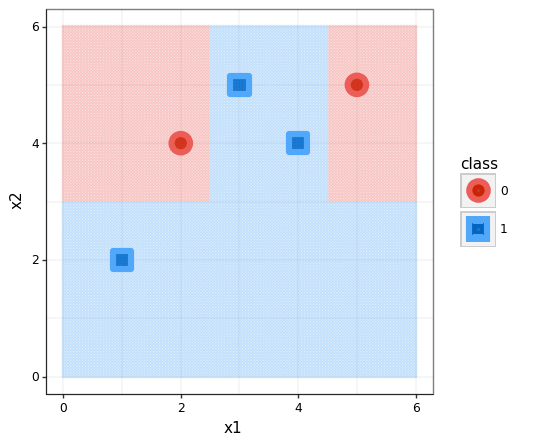

<ggplot: (8739054492845)>

In [ ]:
example_data['class'] = example_data['class'].astype('category') # now we can cast `class` back into categorical
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(gbm_class)'),  size = .5, alpha = 0.2)

### Gradient Boosting from sklearn (just verify the results)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=3, random_state=1) # uses DecisionTreeRegressor by default

# train GBM on our data
np.random.seed(1111)
gbm.fit(example_data[['x1','x2']], example_data[['class']])

GradientBoostingClassifier(n_estimators=3, random_state=1)

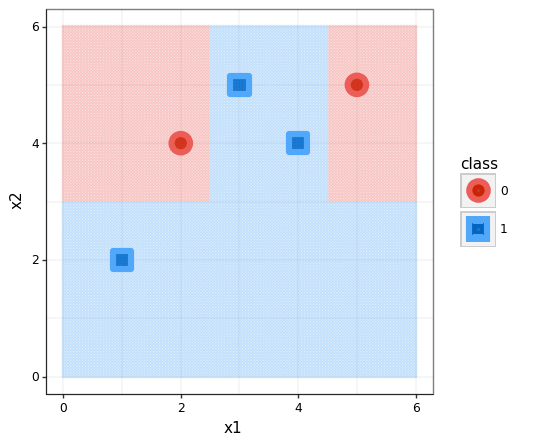

<ggplot: (8739054696241)>

In [ ]:
grid_data['gbm_ensemble'] = model.predict(grid_data[['x1', 'x2']])
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(gbm_ensemble)'),  size = .5, alpha = 0.2)

# Stacking
On top of everything we have seen, you can still improve the results by training the meta-learner (meta-model) that would use predictions of other models as input.

In [ ]:
from tensorflow.keras.datasets import mnist
(images, labels), _ = mnist.load_data()

# reshape into a matrix format
images = images.reshape(-1, 28*28)

# use fewer images for faster training
train_images = images[0:2000]
train_labels = labels[0:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

First we should again train familiar three models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

np.random.seed(1111) 
model1.fit(train_images, train_labels)

np.random.seed(1111) 
model2.fit(train_images, train_labels)

np.random.seed(1111) 
model3.fit(train_images, train_labels)


LogisticRegression()

We can go ahead and test these machine learning models on the test data

In [ ]:
model1_pred = model1.predict(test_images)
model2_pred = model2.predict(test_images)
model3_pred = model3.predict(test_images)

print(f"Accuracy of DT {model1.score(test_images, test_labels)*100}%")
print(f"Accuracy of NN {model2.score(test_images, test_labels)*100}%")
print(f"Accuracy of LR {model3.score(test_images, test_labels)*100}%")

Accuracy of DT 76.6%
Accuracy of NN 91.2%
Accuracy of LR 87.8%


Classical stacking, we need to run CV algorithm and record predictions made by each model on the hold out data. Then we will use theses predictions as training data for the meta-learner.

In [ ]:
from sklearn.model_selection import StratifiedKFold

hold_out_pred_model1 = []
hold_out_pred_model2 = []
hold_out_pred_model3 = []

n_folds = 4

X = np.array(train_images)
y = np.array(train_labels)

# initialise splitting mechanism
folds = StratifiedKFold(n_splits=n_folds, shuffle = False) # no need to shuffle the data

# here actual splitting is done
folds.get_n_splits(X, y)

fold_indx = 1

# folds.split is an iterator that loops over different folds
# returning a tuple with train and val indeces
for train_index, val_index in folds.split(X, y):
  print(f"CV #{fold_indx}")
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  # train all three models
  model1.fit(X_train, y_train)
  model2.fit(X_train, y_train)
  model3.fit(X_train, y_train)

  # make predictions on hold out set
  hold_out_pred_model1.extend(model1.predict_proba(X_val)) # we use predict_proba function to get a vector of probabilities for each class
  hold_out_pred_model2.extend(model2.predict_proba(X_val))
  hold_out_pred_model3.extend(model3.predict_proba(X_val))

  fold_indx += 1

Let's concatenate all these predictions into one dataset. Each model outputs probabilities for each class (there are 10 classes in the dataset), which means that for each digit (2000 in the training data) we will have 10 values from each model, which adds up to 30 values in total (from 3 models). 

In [ ]:
train_stacking = np.concatenate([hold_out_pred_model1,
                                 hold_out_pred_model2, 
                                 hold_out_pred_model3], 
                                axis = 1)
train_stacking.shape

(2000, 30)

In [ ]:
train_stacking

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53885994e-23, 8.61206755e-11, 1.31939847e-20],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.34695424e-37, 2.44455255e-27, 1.15007797e-20],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.75503697e-24, 2.06597739e-24, 1.95219130e-21],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.28127403e-57, 7.08615314e-21, 3.94538372e-27],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.40302819e-15, 1.85150089e-10, 1.16774156e-13],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.05930258e-36, 2.20633171e-26, 6.08828856e-23]])

We need also a test set for the stacking model, but this is simpler

In [ ]:
model1_pred = model1.predict_proba(test_images)
model2_pred = model2.predict_proba(test_images)
model3_pred = model3.predict_proba(test_images)

test_stacking = np.concatenate([model1_pred, 
                                model2_pred, 
                                model3_pred], 
                                axis = 1)

test_stacking.shape

(1000, 30)

Train a meta-model (e.g. Support Vector Classifier, Logistic Regression or Decision Tree or something else) using these predictions as training data.

In [ ]:
from sklearn.svm import SVC
stacking_model = SVC()

np.random.seed(1111) 
stacking_model.fit(train_stacking, train_labels)

SVC()

In [ ]:
print(f"Accuracy of stacking ensemble {stacking_model.score(test_stacking, test_labels)*100}%")

Accuracy of stacking ensemble 92.80000000000001%


###Sklearn implementation of Stacking 

Of course, sklearn can do it for you :)

In [ ]:
from sklearn.ensemble import StackingClassifier
np.random.seed(1111) 
estimators = [('decision_tree', DecisionTreeClassifier()),
              ('knn', KNeighborsClassifier()),
              ('log_reg', LogisticRegression())]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC(), cv=n_folds)
stacking_classifier.fit(train_images, train_labels)
print(f"Accuracy of sklearn stacking ensemble {stacking_classifier.score(test_images, test_labels)*100}%")

Accuracy of sklearn stacking ensemble 93.2%


In [ ]:
print(f"Accuracy of manual stacking ensemble {stacking_model.score(test_stacking, test_labels)*100}%")

Accuracy of manual stacking ensemble 92.80000000000001%
